In [2]:
import sqlite3
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# Load Data from sqlite

In [4]:
conn = sqlite3.connect('yelp_dataset_business.db') 
df_business= pd.read_sql("""SELECT * FROM business""",conn )
conn.close()

In [5]:
conn = sqlite3.connect('yelp_dataset_tips.db') 
df_tips= pd.read_sql("""SELECT * FROM tips""",conn )
conn.close()

In [76]:
conn = sqlite3.connect('yelp_dataset_users.db') 
df_users= pd.read_sql("""SELECT * FROM users""",conn )
conn.close()

In [7]:
conn = sqlite3.connect('yelp_dataset_checkin.db') 
df_checkin= pd.read_sql("""SELECT * FROM checkin""",conn )
conn.close()

In [8]:
conn = sqlite3.connect('yelp_dataset_reviews.db') 
df_reviews= pd.read_sql("""SELECT * FROM reviews""",conn )
conn.close()

# Data Prepocessing

## Flatten attribute and hours in business table

In [9]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [10]:
df_business.is_open = df_business.is_open.astype(int)
df_business["review_count"]= df_business["review_count"].astype(int)
df_business['attributes']= df_business['attributes'].apply(lambda x: eval(x) if x else None)
df_business['hours']= df_business['hours'].apply(lambda x: eval(x) if x else None)

In [11]:
attr = [col for col in df_business.attributes.explode().unique() if col is not None]
lst_of_attr_dict = []
for attr_dict in df_business.attributes:
    if not attr_dict:
        lst_of_attr_dict.append({})
        continue

    if 'BusinessParking' in attr_dict:
        if type(attr_dict['BusinessParking']) == str:
            attr_dict['BusinessParking'] = ('True' in attr_dict['BusinessParking'])

    lst_of_attr_dict.append(attr_dict)
attr_df = pd.DataFrame(lst_of_attr_dict, columns=attr)

for col in attr_df:
        attr_df[col] = attr_df[col].fillna(False).astype(bool)
    
df_business = pd.concat([df_business.reset_index().drop('index', axis=1), attr_df], axis=1)
df_business.drop(['attributes'], axis=1, inplace=True)
lst_of_time = []
for time_dict in df_business.hours:
    if not time_dict:
        lst_of_time.append({})
        continue
    lst_of_time.append(time_dict)
time_df = pd.DataFrame(lst_of_time)
df_business = pd.concat([df_business, time_df], axis=1).drop('hours', axis=1)

In [12]:
df_business.isnull().sum()

business_id                       0
name                              0
address                           0
city                              0
state                             0
postal_code                       0
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
categories                      103
ByAppointmentOnly                 0
BusinessAcceptsCreditCards        0
BikeParking                       0
RestaurantsPriceRange2            0
CoatCheck                         0
RestaurantsTakeOut                0
RestaurantsDelivery               0
Caters                            0
WiFi                              0
BusinessParking                   0
WheelchairAccessible              0
HappyHour                         0
OutdoorSeating                    0
HasTV                             0
RestaurantsReservations           0
DogsAllowed                 

In [ ]:
df_business[["stars",'review_count']]

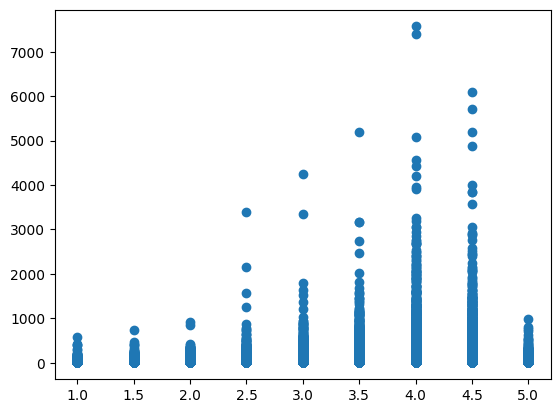

In [108]:
plt.scatter(x= df_business[["stars",'review_count']]['stars'],y=df_business[["stars",'review_count']]['review_count'])

## tips

In [13]:
df_tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [14]:
df_tips.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

In [15]:
df_tips['date']= pd.to_datetime(df_tips['date'])

<Axes: >

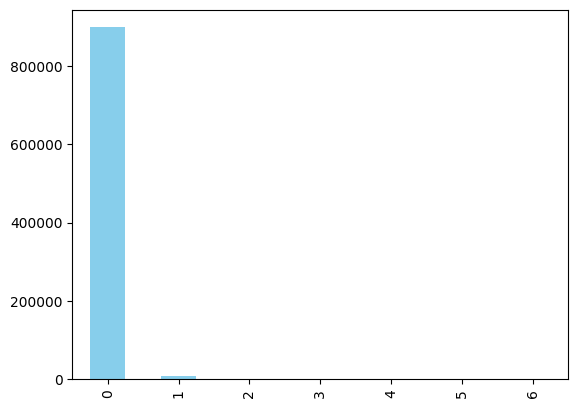

In [25]:
df_tips['compliment_count'].value_counts().plot(kind='bar', color='skyblue')

In [20]:
grouped = df_tips.groupby(['user_id']).size().value_counts()

<Axes: >

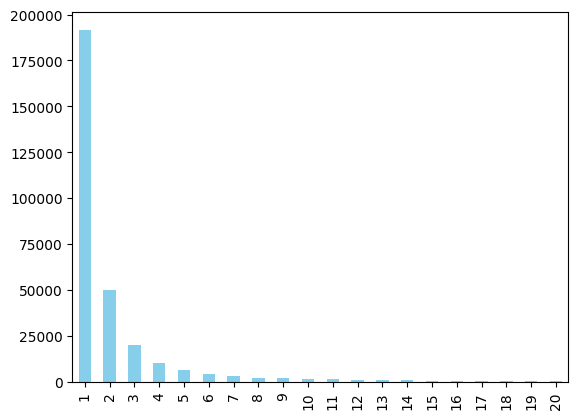

In [23]:
grouped[:20].plot(kind='bar', color='skyblue')

In [18]:
df_tips.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

##  user

In [82]:
df_users.dtypes

user_id                       object
name                          object
review_count                   int64
yelping_since         datetime64[ns]
useful                         int64
funny                          int64
cool                           int64
elite                         object
friends                       object
fans                           int64
average_stars                float64
compliment_hot                 int64
compliment_more                int64
compliment_profile             int64
compliment_cute                int64
compliment_list                int64
compliment_note                int64
compliment_plain               int64
compliment_cool                int64
compliment_funny               int64
compliment_writer              int64
compliment_photos              int64
dtype: object

In [81]:
df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,{2007},"[NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8q...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"{2016, 2017, 2018, 2019, 2020, 2021, 2009, 201...","[ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"{2009, 2010, 2011, 2012, 2013}","[LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgy...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"{2009, 2010, 2011}","[enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74V...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,{},"[PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMb...",1,...,1,0,0,0,1,1,0,0,0,0


In [77]:
df_users['yelping_since']= pd.to_datetime(df_users['yelping_since'])

In [78]:
df_users["friends"] = df_users['friends'].apply(lambda x : x.split(", "))

### after viewing the year data, there is an error on year 2020, representation in data set(20,20)

In [79]:
def convert_year_20(elite):
    elite = elite.split(",")
    for index, value in enumerate(elite):
        if value =='20':
           elite[index] = 2020
        elif value =='':
            continue
        else:
            elite[index] = int(value)
    return set(elite)


In [80]:
df_users["elite"] = df_users['elite'].apply(lambda x : convert_year_20(x))

## checkin 

In [87]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"[2020-03-13 21:10:56, 2020-06-02 22:18:06, 2..."
1,--0iUa4sNDFiZFrAdIWhZQ,"[2010-09-13 21:43:09, 2011-05-04 23:08:15, 2..."
2,--30_8IhuyMHbSOcNWd6DQ,"[2013-06-14 23:29:17, 2014-08-13 23:20:22]"
3,--7PUidqRWpRSpXebiyxTg,"[2011-02-15 17:12:00, 2011-07-28 02:46:10, 2..."
4,--7jw19RH9JKXgFohspgQw,"[2014-04-21 20:42:11, 2014-04-28 21:04:46, 2..."


In [86]:
df_checkin['date'] = df_checkin['date'].apply(lambda x: x.split(","))

## Review

In [89]:
df_reviews['date']= pd.to_datetime(df_reviews['date'])
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [91]:
review_count = df_reviews.groupby("business_id").size()

pandas.core.series.Series